<a href="https://colab.research.google.com/github/Vedu-Singh/Data-Science/blob/main/Ridge_LassoRegression_ML_Boston_HousePricing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Practical Implementation of Ridge-Lasco Linear Regression modal on house_pricing dataset **

In [ ]:
# RIDGE REGRESSION -> SOLVES OVERFITTING CONDITION IN LINEAR REGRESSION BY ADDING TWO PARAMETERS LAMBDA AND SLOPE**2 .. This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).
# syntax -> class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)
# Linear least squares with l2 regularization.
# Minimizes the objective function: ||y - Xw||^2_2 + alpha * ||w||^2_2
# parameters --> all possible parameters in l2 norm
# 1.> alpha{float, ndarray of shape (n_targets,)}, default=1.0 {Constant that multiplies the L2 term, controlling regularization strength. alpha must be a non-negative float i.e. in [0, inf).} NOTE: When alpha = 0, the objective is equivalent to ordinary least squares, solved by the LinearRegression object. For numerical reasons, using alpha = 0 with the Ridge object is not advised. Instead, you should use the LinearRegression object.
# 2.> fit_interceptbool, default=True {Whether to fit the intercept for this model. If set to false, no intercept will be used in calculations (i.e. X and y are expected to be centered).}
# 3.> copy_Xbool, default=True {If True, X will be copied; else, it may be overwritten.}
# 4.> max_iterint, default=None {Maximum number of iterations for conjugate gradient solver. For ‘sparse_cg’ and ‘lsqr’ solvers, the default value is determined by scipy.sparse.linalg. For ‘sag’ solver, the default value is 1000. For ‘lbfgs’ solver, the default value is 15000.}
# 5.> tolfloat, default=1e-4 {The precision of the solution (coef_) is determined by tol which specifies a different convergence criterion for each solver.}
# 6.> solver{‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’
# 7.> positivebool, default=False { When set to True, forces the coefficients to be positive. Only ‘lbfgs’ solver is supported in this case. }
# 8.> random_stateint, RandomState instance, default=None { Used when solver == ‘sag’ or ‘saga’ to shuffle the data.}

** LINEAR REGRESSION - BOSTON HOUSE-PRICING DATASET **

In [ ]:
# import all libraries -->
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# divide the dataset into independent and depenedent feature's ---> { i.e X and y }
# URL of the Boston Housing dataset CSV file
csv_url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'

# Load the dataset into a DataFrame
df_boston = pd.read_csv(csv_url)

# Display the first few rows of the DataFrame
print(df_boston.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
## Independent features and dependent features
X = df_boston.drop('medv', axis=1)
y = df_boston['medv']

In [ ]:
# dataframe format -->
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
y.tail()

,medv
501,22.4
502,20.6
503,23.9
504,22.0
505,11.9


In [ ]:
y_new = np.array(y)
y_new

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
## train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [ ]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [ ]:
y_train

,medv
5,28.7
116,21.2
45,19.3
16,23.1
468,19.1
360,25.0
3,33.4
405,5.0
185,29.6
60,18.7


In [ ]:
## Step1 -> standardizing the dataset --> Data Scaling  {Gradient Descent}
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

In [ ]:
# Step2 --> import linear regression from linear model under sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)       # here we have multiple i/p feature's --> multi-linear Regression problem

LinearRegression()

In [ ]:
# here in LR we have 3-4 parameters only so how we can perform hyper-parameter tuning -> one way use rich and lasso regression
# second way --> use cross-validation technique { we basically internally train data is divided into sub-parts {different train_test-splits} -> then finally atlast m uska mean calculate krte h}

# cross-validation -->
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=10 , scoring='neg_mean_squared_error')
scores

array([-20.96899446, -28.56556055, -48.78676527, -17.90181938,
       -27.86935858, -24.85480776, -18.65321599, -18.02764879,
       -13.94804652, -35.9303906 ])

In [ ]:
np.mean(scores)   # after perfroming CV our mse {difference btw predicted and truth value} is good {it should be minimum} -->

-25.550660791660828

In [ ]:
# Step3 -> make predictions on Testing data
y_pred = model.predict(X_test)
y_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

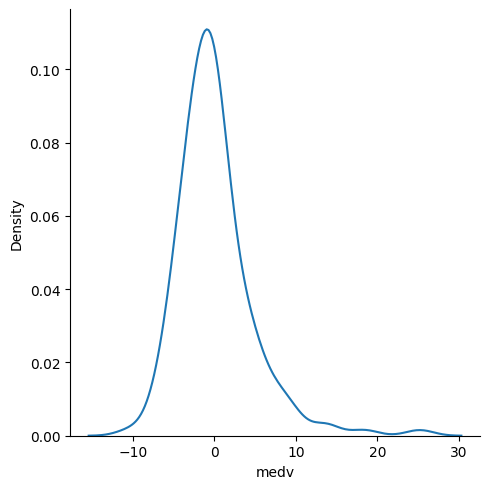

In [ ]:
# step4 -> modal evaluation {make comparison with truth values (y_test)}
sns.displot(y_test-y_pred, kind = 'kde')

In [ ]:
# Step5 --> calculate modal performance in terms of mse , rmse , r2_score of y_pred w.r.t y_test

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

21.517444231177183
3.1627098714574013
0.7112260057484936


In [ ]:
r2_score(y_test,y_pred)

0.7112260057484936

** RIDGE-REGRESSION ALGORITHM ==> L2-NORM / L2-REGULARISATION {to solve overfitting problem in LR} **

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV                 # for cross-val { hyper-parameter tuning -> with alpha {lambda} value for perfect parameter selection for this method we use gridSearchCV}

In [ ]:
model = Ridge()

In [ ]:
model

Ridge()

In [28]:
parameters = {'alpha': [1,2,5,10,20,30,40,50,60,70,80,90]}
ridge_cv = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)           # internally it will perform 5 cv with above alpha parameters so that it will select right parameters
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [30]:
print(ridge_cv.best_params_)             # best parameter
print(ridge_cv.best_score_)              # best score - mse

{'alpha': 1}
-26.223960793084494


In [35]:
# predict on test data -->
y_pred1 = ridge_cv.predict(X_test)
y_pred1

array([28.34715071, 36.21437831, 14.80303493, 25.22804634, 19.17458952,
       22.29031648, 17.33028278, 13.95318273, 22.14506024, 20.74582213,
       24.14011309, 18.40447565, -7.01750315, 21.1846762 , 19.19820978,
       26.02798498, 19.86973569,  5.51208138, 40.33260217, 17.84866562,
       27.65388459, 30.02887972, 10.98804148, 24.46625789, 18.37620309,
       15.25046005, 22.61319214, 14.80791284, 21.62917267, 19.57814764,
       21.73254632, 25.36726035, 25.30044412, 19.30763226, 15.88564352,
       18.87116841, 30.92984029, 20.76386724, 23.49286646, 24.67082407,
       14.0468997 , 31.67610639, 42.34382119, 17.35629744, 26.91818696,
       17.33727443, 13.86600737, 25.91730843, 19.76761959, 30.38603367,
       21.22823089, 33.9789751 , 15.71192385, 26.17445031, 39.58477186,
       22.87290593, 19.40274082, 33.07593414, 24.76614616, 12.67254167,
       23.02338367, 31.20498451, 31.79965924, 16.82657749, 21.53203533,
       15.72325795, 20.43639171, 26.13467468, 31.26561709, 12.25

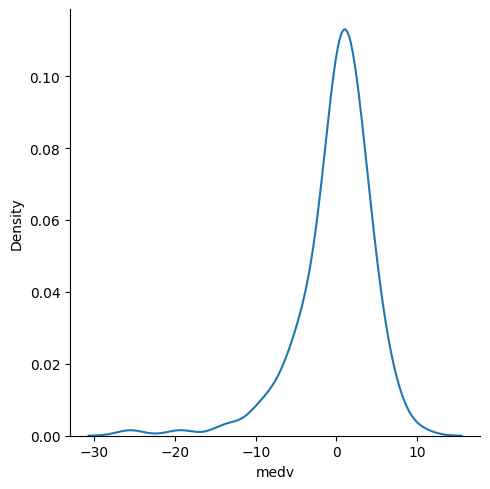

In [36]:
# modal evaluation {make comparison with truth values (y_test)}
sns.displot(y_pred1-y_test, kind = 'kde')                 # analyse the variance of graph -> difference -10 to 10 {variance less - modal performance high }

In [37]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred1))


0.7041586727559435


** LASSO-REGRESSION ALGORITHM ==> L1-NORM / L1-REGULARISATION {to solve overfitting problem in LR} -> used for automatic feature selection **

In [38]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [40]:
model1 = Lasso()
model1

Lasso()

In [41]:
# documentation -> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
parameters = {'alpha': [1,2,5,10,20,30,40,50,60,70,80,90]}
lasso_cv = GridSearchCV(model1, parameters, scoring='neg_mean_squared_error', cv=5)           # internally it will perform 5 cv with above alpha parameters so that it will select right parameters
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [42]:
print(lasso_cv.best_params_)             # best parameter
print(lasso_cv.best_score_)              # best score - mse

{'alpha': 1}
-30.73879670583138


In [44]:
# predict on test data -->
y_pred2 = ridge_cv.predict(X_test)
y_pred2

array([28.34715071, 36.21437831, 14.80303493, 25.22804634, 19.17458952,
       22.29031648, 17.33028278, 13.95318273, 22.14506024, 20.74582213,
       24.14011309, 18.40447565, -7.01750315, 21.1846762 , 19.19820978,
       26.02798498, 19.86973569,  5.51208138, 40.33260217, 17.84866562,
       27.65388459, 30.02887972, 10.98804148, 24.46625789, 18.37620309,
       15.25046005, 22.61319214, 14.80791284, 21.62917267, 19.57814764,
       21.73254632, 25.36726035, 25.30044412, 19.30763226, 15.88564352,
       18.87116841, 30.92984029, 20.76386724, 23.49286646, 24.67082407,
       14.0468997 , 31.67610639, 42.34382119, 17.35629744, 26.91818696,
       17.33727443, 13.86600737, 25.91730843, 19.76761959, 30.38603367,
       21.22823089, 33.9789751 , 15.71192385, 26.17445031, 39.58477186,
       22.87290593, 19.40274082, 33.07593414, 24.76614616, 12.67254167,
       23.02338367, 31.20498451, 31.79965924, 16.82657749, 21.53203533,
       15.72325795, 20.43639171, 26.13467468, 31.26561709, 12.25

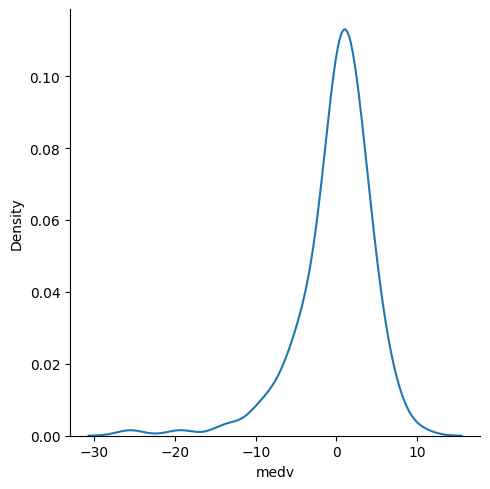

In [45]:
sns.displot(y_pred2-y_test, kind = 'kde')                 # analyse the variance of graph -> difference -10 to 10 {variance less - modal performance high }

In [46]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred2))

0.7041586727559435
